In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from einsteinpy.symbolic import MetricTensor,ChristoffelSymbols,RicciTensor,RicciScalar,EinsteinTensor


In [2]:
syms=sp.symbols("t r theta phi")
t,r,theta,phi=syms

In [5]:
nu=sp.Function("nu")
b=sp.Function("b")
p=sp.Function("p")
rho=sp.Function("rho")
mu=sp.symbols("mu")

In [6]:
m = sp.diag(-sp.exp(nu(r)), 1/(1-(b(r)/r)),r**2, (r**2)*sp.sin(theta)**2).tolist()

In [7]:
metric=MetricTensor(m,syms)

In [8]:
metric.tensor()

[[-exp(nu(r)), 0, 0, 0], [0, 1/(1 - b(r)/r), 0, 0], [0, 0, r**2, 0], [0, 0, 0, r**2*sin(theta)**2]]

In [10]:
ch=ChristoffelSymbols.from_metric(metric)
ch.simplify()

[[[0, Derivative(nu(r), r)/2, 0, 0], [Derivative(nu(r), r)/2, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]], [[(r - b(r))*exp(nu(r))*Derivative(nu(r), r)/(2*r), 0, 0, 0], [0, (r*Derivative(b(r), r) - b(r))/(2*r*(r - b(r))), 0, 0], [0, 0, -r + b(r), 0], [0, 0, 0, (-r + b(r))*sin(theta)**2]], [[0, 0, 0, 0], [0, 0, 1/r, 0], [0, 1/r, 0, 0], [0, 0, 0, -sin(2*theta)/2]], [[0, 0, 0, 0], [0, 0, 0, 1/r], [0, 0, 0, 1/tan(theta)], [0, 1/r, 1/tan(theta), 0]]]

In [11]:
ricci=RicciTensor.from_metric(metric)
ricci.simplify()

[[(r*(r - b(r))*(Derivative(nu(r), r)**2 + 2*Derivative(nu(r), (r, 2))) + 4*(r - b(r))*Derivative(nu(r), r) - (r*Derivative(b(r), r) - b(r))*Derivative(nu(r), r))*exp(nu(r))/(4*r**2), 0, 0, 0], [0, (-r*(r*(r - b(r))*(Derivative(nu(r), r)**2 + 2*Derivative(nu(r), (r, 2))) - (r*Derivative(b(r), r) - b(r))*Derivative(nu(r), r))/4 + r*Derivative(b(r), r) - b(r))/(r**2*(r - b(r))), 0, 0], [0, 0, (-r*(r - b(r))*Derivative(nu(r), r) + r*Derivative(b(r), r) + b(r))/(2*r), 0], [0, 0, 0, (-r*(r - b(r))*Derivative(nu(r), r) + r*Derivative(b(r), r) + b(r))*sin(theta)**2/(2*r)]]

In [12]:
ricciscalar=RicciScalar.from_metric(metric)
ricciscalar.simplify()

(-r*(r - b(r))*(Derivative(nu(r), r)**2 + 2*Derivative(nu(r), (r, 2))) - 4*(r - b(r))*Derivative(nu(r), r) + (r*Derivative(b(r), r) - b(r))*Derivative(nu(r), r) + 4*Derivative(b(r), r))/(2*r**2)

In [13]:
einst = EinsteinTensor.from_metric(metric)
einst.simplify()

[[exp(nu(r))*Derivative(b(r), r)/r**2, 0, 0, 0], [0, 1.0*(r**2*Derivative(nu(r), r) - r*b(r)*Derivative(nu(r), r) - b(r))/(r**2*(r - b(r))), 0, 0], [0, 0, (-r*(r - b(r))*Derivative(nu(r), r) + r*(0.5*r*(r - b(r))*(Derivative(nu(r), r)**2 + 2*Derivative(nu(r), (r, 2))) + 2.0*(r - b(r))*Derivative(nu(r), r) - 0.5*(r*Derivative(b(r), r) - b(r))*Derivative(nu(r), r) - 2.0*Derivative(b(r), r)) + r*Derivative(b(r), r) + b(r))/(2*r), 0], [0, 0, 0, (-r*(r - b(r))*Derivative(nu(r), r) + 0.5*r*(r*(r - b(r))*(Derivative(nu(r), r)**2 + 2*Derivative(nu(r), (r, 2))) + 4*(r - b(r))*Derivative(nu(r), r) - (r*Derivative(b(r), r) - b(r))*Derivative(nu(r), r) - 4*Derivative(b(r), r)) + r*Derivative(b(r), r) + b(r))*sin(theta)**2/(2*r)]]

In [38]:
EFE_1=sp.Eq(einst.tensor()[0,0],8*sp.pi*-rho(r)*metric.tensor()[0,0])
EFE_1

Eq(exp(nu(r))*Derivative(b(r), r)/r**2, 8*pi*rho(r)*exp(nu(r)))

In [39]:
sol_1=sp.solve(EFE_1,rho(r))[0]
sol_1

Derivative(b(r), r)/(8*pi*r**2)

In [40]:
EFE_2=sp.Eq(einst.tensor()[1,1],p(r)*metric.tensor()[1,1])
EFE_2

Eq(1.0*(r**2*Derivative(nu(r), r) - r*b(r)*Derivative(nu(r), r) - b(r))/(r**2*(r - b(r))), p(r)/(1 - b(r)/r))

In [41]:
sol_2=sp.solve(EFE_2,p(r))[0]
sol_2

(r**2*Derivative(nu(r), r) - r*b(r)*Derivative(nu(r), r) - b(r))/r**3

In [42]:
eos=sp.Eq(p(r),-2*rho(r))
eos

Eq(p(r), -2*rho(r))

In [43]:
Cons_eq=sp.Eq(sp.diff(p(r),r)+0.5*(rho(r)+p(r))*sp.diff(nu(r),r),0)
Cons_eq

Eq((0.5*p(r) + 0.5*rho(r))*Derivative(nu(r), r) + Derivative(p(r), r), 0)

In [44]:
Cons_Eq=Cons_eq.subs([(rho(r),sol_1),(p(r),-2*sol_1)])
Cons_Eq

Eq(Derivative(-Derivative(b(r), r)/(4*pi*r**2), r) - 0.0625*Derivative(b(r), r)*Derivative(nu(r), r)/(pi*r**2), 0)

In [45]:
Cons_Eq_simplify=Cons_Eq.simplify()
Cons_Eq_simplify

Eq(0.0625*Derivative(b(r), r)*Derivative(nu(r), r)/(pi*r**2) + Derivative(b(r), (r, 2))/(4*pi*r**2) - Derivative(b(r), r)/(2*pi*r**3), 0)

In [46]:
Cons_Eq_Simplify=Cons_Eq_simplify.subs(nu(r),0)
Cons_Eq_Simplify

Eq(0.0625*Derivative(0, r)*Derivative(b(r), r)/(pi*r**2) + Derivative(b(r), (r, 2))/(4*pi*r**2) - Derivative(b(r), r)/(2*pi*r**3), 0)

In [47]:
sol_3=sp.dsolve(Cons_Eq_Simplify,b(r))
sol_3

Eq(b(r), C1 + C2*r**3)

In [49]:
C1_value=sp.solve(sol_3.rhs.subs(r,0))[0]
C1_value

0

In [53]:
C1=sp.Symbol("C1")
C2=sp.Symbol("C2")
sol_3=sol_3.subs([(C1,C1_value),(C2,8*sp.pi/3)])
sol_3

Eq(b(r), 8*pi*r**3/3)

* `func = sympy.lambdify(args, expr, modules="numpy")`:

### Parameters:

1.`args`**(list,tuples or symbol):** <br><br>
     **This specifies the variables (or symbols) in the SymPy expression that you want to be the inputs of the function.**
     **It can be a single symbol, a list of symbols, or a tuple of symbols.The first argument to `lambdify` specifies the input   
      variables for the function.**<br><br>
2.`expr`**(Sympy Expression):**<br><br>
     **The SymPy expression that you want to convert into a function. This is the expression that will be evaluated when you   
      the generated function.The second argument is the symbolic expression that we want to evaluate**..<br><br>
3.`modules`**(string, list, or dictionary, optional):**<br><br>   
      **This specifies the numerical libraries or modules that should be used to evaluate the expression.
      The third argument tells lambdify to use NumPy for numerical evaluation, which allows func to handle NumPy arrays and   
      perform fast numerical operations.**
      
### Benefits of `lambdify`:

* `Performance:` **By converting symbolic expressions to functions that use `NumPy` or other numerical libraries, `lambdify` allows for faster evaluations, especially for large datasets or iterative computations.**<br><br>

* `Flexibility:`**You can easily switch between different numerical libraries or even use custom functions.**<br><br>

* `Integration:` **`lambdify` makes it easy to integrate symbolic math with other parts of your code, especially when combined with data processing, optimization, or numerical simulation.**<br><br>

### Conclusions:

* `lambdify` **is a crucial tool in the SymPy library that enables the conversion of symbolic expressions into efficient numerical functions. It allows users to leverage the power of symbolic computation for defining mathematical models while also taking advantage of the speed and efficiency of numerical libraries for evaluation and further analysis.**<br><br>

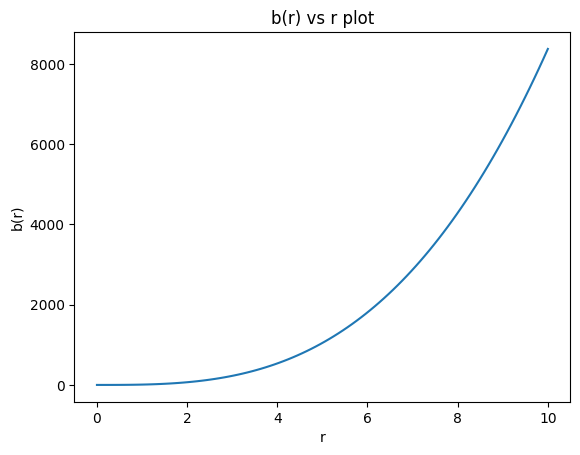

In [55]:
func=sp.lambdify(r,sol_3.rhs,"numpy") # Convert the symbolic expression to a numerical function using lambdify
r_vals=np.linspace(0,10,100)
b_vals=func(r_vals) # Now, func is a callable function that can be used with numerical inputs
plt.ylabel("b(r)")
plt.xlabel("r")
plt.title("b(r) vs r plot")
plt.plot(r_vals,b_vals)
plt.show()